In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
! tar -xvf "/content/gdrive/MyDrive/PMCC/result.tar"

work/
work/KateData_yolo/
work/KateData_yolo/classes.txt
work/KateData_yolo/images/
work/KateData_yolo/images/10 Gy_GFP-H2B_A1_1_2023y06m24d_23h17m.png
work/KateData_yolo/images/10 Gy_GFP-H2B_B1_2_2023y06m24d_18h17m.png
work/KateData_yolo/images/10 Gy_GFP-H2B_A2_1_2023y06m25d_06h17m.png
work/KateData_yolo/images/10 Gy_GFP-H2B_A2_1_2023y06m25d_02h17m.png
work/KateData_yolo/images/10 Gy_GFP-H2B_A1_3_2023y06m25d_03h17m.png
work/KateData_yolo/images/10 Gy_GFP-H2B_A1_3_2023y06m25d_07h17m.png
work/KateData_yolo/images/10 Gy_GFP-H2B_A1_3_2023y06m24d_22h17m.png
work/KateData_yolo/images/10 Gy_GFP-H2B_A1_1_2023y06m25d_21h17m.png
work/KateData_yolo/images/10 Gy_GFP-H2B_A1_1_2023y06m26d_11h17m.png
work/KateData_yolo/images/10 Gy_GFP-H2B_B1_2_2023y06m25d_12h17m.png
work/KateData_yolo/images/10 Gy_GFP-H2B_A2_1_2023y06m24d_23h17m.png
work/KateData_yolo/images/10 Gy_GFP-H2B_A1_1_2023y06m26d_15h17m.png
work/KateData_yolo/images/10 Gy_GFP-H2B_B1_2_2023y06m25d_16h17m.png
work/KateData_yolo/images/10 Gy_

In [ ]:
pip install label-studio-sdk

In [ ]:
# Define the URL where Label Studio is accessible and the API key for your user account
LABEL_STUDIO_URL = 'https://www.jcy.me'
API_KEY = "bef5f66a3ae0c85e36e37324f44d71c3c30957eb"

# Import the SDK and the client module
from label_studio_sdk.client import LabelStudio
# Connect to the Label Studio API and check the connection
ls = LabelStudio(base_url=LABEL_STUDIO_URL, api_key=API_KEY)

tasks = ls.tasks.list(project=10, include='id')
for task in tasks:
    print(task)
    break

id=53147 predictions=None annotations=None drafts=None annotators=None inner_id=None cancelled_annotations=None total_annotations=None total_predictions=None completed_at=None file_upload=None storage_filename=None avg_lead_time=None draft_exists=None updated_by=None data=None meta=None created_at=None updated_at=None is_labeled=None overlap=None comment_count=None unresolved_comment_count=None last_comment_updated_at=None project=None comment_authors=None


In [ ]:
from PIL import Image
import requests
from tqdm import tqdm

project = ls.projects.get(10)
tasks = ls.tasks.list(project=project.id)
images = []
for i, task in enumerate(tqdm(tasks)):
    url = f'http://localhost:8080{task["data"]["image"]}'
    image = Image.open(requests.get(url, headers={'Authorization': f'Token {API_KEY}'}, stream=True).raw)

ApiError: status_code: 404, body: {'id': '1c7f61cc-267c-4e7c-b232-4a4882346661', 'status_code': 404, 'version': '1.12.0.post0', 'detail': 'Not found.', 'exc_info': None}

In [ ]:
from PIL import Image
import os

path = "/content/work/KateData_yolo/images/"

# crop image into 6 rows, 5 cols
box_w, box_h = 224, 224
x,y = 200, 204

for file in os.listdir(path):
  im = Image.open(path+file)
  for i in range(30):
    cur_x, cur_y = x * i//5, y * i%5
    box = (cur_x, cur_y, cur_x + box_w, cur_y + box_h)
    img2 = im.crop(box)
    img2.save("/content/res/" + file.split('.')[0] + '-' + str(i) + '.png')
  break

In [ ]:
import numpy as np
img = np.array(img2)
img.transpose(2,0,1).shape

(3, 224, 224)

In [ ]:
import os
from os import listdir
from os.path import isfile, join
from torchvision.io import read_image
import torch
from torch.utils.data import Dataset
from torchvision import datasets,transforms
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
from torchvision.transforms import v2
import subprocess
import json

H, W = 32, 32
img = torch.randint(0, 256, size=(3, H, W), dtype=torch.uint8)

transforms = v2.Compose([
    transforms.Lambda(lambda x: x.transpose(2,0,1)),
    # v2.Grayscale(),
    # transforms.Lambda(lambda x: x.expand(3,-1,-1)),
    # v2.RandomResizedCrop(size=(224, 224), antialias=True),
    transforms.Resize(size = (224,224)),
    v2.RandomHorizontalFlip(p=0.5),
    v2.ToDtype(torch.float32, scale=True),
    v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
transforms(img).shape

TypeError: transpose() received an invalid combination of arguments - got (int, int, int), but expected one of:
 * (int dim0, int dim1)
 * (name dim0, name dim1)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
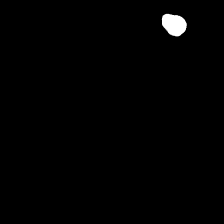

In [ ]:
import copy
import os

import imageio
import matplotlib as mpl
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np
import zipfile

from skimage.io import imread, imsave, imshow
from skimage.transform import resize as imresize
from skimage.color import rgb2gray

import cv2

a = np.load("/content/task-58695-annotation-288-by-8-brush-mn_mask-1.npy")
a

In [ ]:
contours, _ = cv2.findContours(a, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
polygons = []

for obj in contours:
    coords = []

    for point in obj:
        coords.append(int(point[0][0]))
        coords.append(int(point[0][1]))

    polygons.append(coords)

(68, 2) (224, 224)


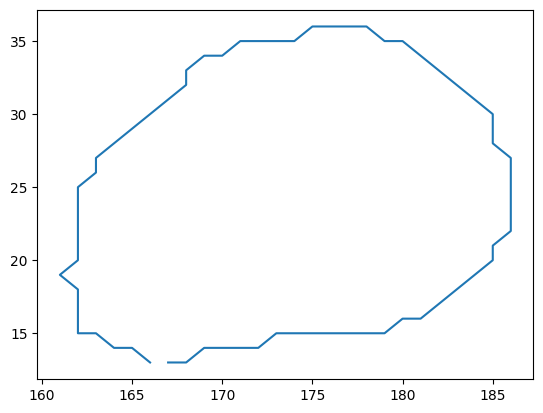

In [ ]:
print(contours[0].squeeze().shape, a.shape)
# plt.imshow(a)
poly = contours[0].squeeze()
np.append(poly, poly[0])
x,y = zip(*poly)
plt.plot(x,y)
# plt.contour(contours[0].squeeze())

In [ ]:
# Import Supervision
import supervision as sv

# Convert each polygon in the array of polygons to masks
bounding_boxes = sv.mask_to_xyxy(masks)

ModuleNotFoundError: No module named 'supervision'

https://github.com/orgs/ultralytics/discussions/6421

TypeError: Image data of dtype object cannot be converted to float

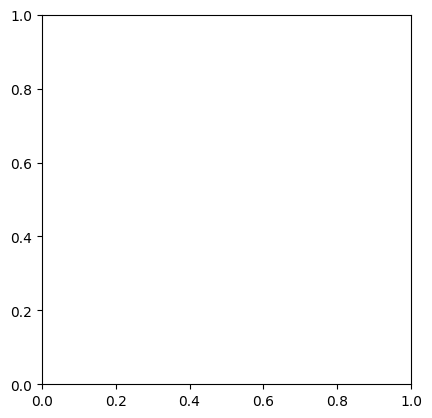

In [ ]:
# Import necessary libraries
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Read an image
img = cv2.imread("image.png")

# Define an array of endpoints of Hexagon
points = np.array([[220, 120], [130, 200], [130, 300],
                   [220, 380], [310, 300], [310, 200]])

# Use fillPoly() function and give input as image,
# end points,color of polygon
# Here color of polygon will be green
cv2.fillPoly(img, pts=[points], color=(0, 255, 0))

# Displaying the image
plt.imshow(img)

# wait for the user to press any key to
# exit window
cv2.waitKey(0)

# Closing all open windows
cv2.destroyAllWindows()

# Covert legacy dataset to the ROI type

In [ ]:
!unzip /content/project-9-at-2024-06-13-03-52-b472fec5.zip -d data

Archive:  /content/project-9-at-2024-06-13-03-52-b472fec5.zip
   creating: data/images/
   creating: data/labels/
  inflating: data/classes.txt        
  inflating: data/notes.json         
  inflating: data/images/10 Gy_GFP-H2B_A1_1_2023y06m25d_21h17m.png  
  inflating: data/images/10 Gy_GFP-H2B_A2_1_2023y06m25d_01h17m.png  
  inflating: data/images/10 Gy_GFP-H2B_A2_1_2023y06m25d_11h17m.png  
  inflating: data/images/10 Gy_GFP-H2B_A1_3_2023y06m25d_14h17m.png  
  inflating: data/images/10 Gy_GFP-H2B_A1_3_2023y06m25d_04h17m.png  
  inflating: data/images/10 Gy_GFP-H2B_B1_2_2023y06m24d_20h17m.png  
  inflating: data/images/10 Gy_GFP-H2B_A1_1_2023y06m26d_05h17m.png  
  inflating: data/images/10 Gy_GFP-H2B_A1_1_2023y06m26d_15h17m.png  
  inflating: data/images/10 Gy_GFP-H2B_A2_1_2023y06m24d_21h17m.png  
  inflating: data/images/10 Gy_GFP-H2B_B1_2_2023y06m25d_00h17m.png  
  inflating: data/images/10 Gy_GFP-H2B_B1_2_2023y06m25d_10h17m.png  
  inflating: data/images/10 Gy_GFP-H2B_A2_1_2023y06

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
from PIL import Image


def load_img(img_path):
  """
  Read an image and convert it to RGB format.

  Args:
    img_path (str): Path to the image file.

  Returns:
    numpy.ndarray: RGB image array from cv2.imread.
  """

  img = Image.open(img_path)
  img_arr = np.array(img)
  return img, img_arr

def load_polys(label_path, target_clas = 7):
  """
  Read a label txt file and convert it to numpy array.

  Args:
    label_path (str): Path to the label text file.

  Returns:
    numpy.ndarray: polygon array that each polygon contains an array of coordinates ([[x,y],...]).
  """

  poly_arr = []
  with open(label_path, 'r') as label_file:
    # Read and print each line in the file
    for line in label_file:
      l = line.strip().split()
      # class type:
          #   4: cell_active_div, 5: cell_non_div, 6: cell_sick_apop, 7: micronuclei
      cls, points = int(l[0]), l[1:]

      # current focus on mn
      if cls != target_clas:
        continue

      points = np.array(points, dtype=np.float64).reshape((-1, 2))
      poly_arr.append(points)
  return poly_arr

def convert_poly_points(xy_length, points):
  points = points*xy_length
  points = points.astype(np.int32)
  return points

def change_origin(origin, wnd_size, points):
  """
  Crop an image based on the given points. Change the points relative coordinates regards to the origin.
  yolo format with relative coordinates: (x - origin_x) / 224, (y - origin_y) / 224
  the window size and origin changed.

  Args:
    origin: array of [x,y]
    wnd_size: int or array of [x,y]
  Returns:

  """
  pts = (points - origin) / wnd_size
  return pts

def convert_ROI_dataset(data_dir, dest_dir):
  image_dir = data_dir + 'images/'
  label_dir = data_dir + 'labels/'

  img_cnt = 0
  mn_cnt = 0

  for file in os.listdir(image_dir):
    img_name = file.split('.')[0]

    # read image
    img, img_arr = load_img(image_dir + file)

    # read polygons
    polys = load_polys(label_dir + img_name + '.txt')

    # points to pixel integer
    xy_length = np.array([img_arr.shape[1], img_arr.shape[0]])
    for i,poly in enumerate(polys):
      points = convert_poly_points(xy_length, poly)

      # crop image, save to dest
      x,y = points[0]
      w,h = 112, 112
      img2 = img.crop((x-w,y-h,x+w,y+h))
      img2.save(dest_dir + "images/" + img_name + '_' + str(i) + '.png')
      img_cnt += 1

      # write label
      new_pts = change_origin(np.array([x-w,y-h]), 224, points)
      write_buffer = []
      write_buffer.append("1 " + " ".join(map(str, new_pts.flatten())))

      # check if any other mn in the window
      for j,poly in enumerate(polys):
        if j == i: continue
        pt = poly[0]*xy_length
        if x-w < pt[0] < x+w and y-h < pt[1] < y+h:
          new_pts = change_origin(np.array([x-w,y-h]), 224, poly)
          write_buffer.append("1 " + " ".join(map(str, new_pts.flatten())))

      with open(dest_dir + "labels/" + img_name + '_' + str(i) + '.txt', 'w') as the_file:
        the_file.write("\n".join(write_buffer))
        mn_cnt += len(write_buffer)

  print("image cnt: {}, mn cnt: {}".format(img_cnt, mn_cnt))

def display(img, points):
    cv2.fillPoly(img, pts=[points], color=(255, 0, 255))

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111)
    ax.imshow(img)


In [ ]:
convert_ROI_dataset("data/", "new_data/")

image cnt: 385, mn cnt: 553


In [ ]:
!tar cf MNseg.tar new_data/

[[0.45391597 0.32687206]
 [0.45504822 0.32872766]
 [0.45504822 0.33130936]
 [0.45361801 0.33324564]
 [0.45200903 0.333407  ]
 [0.45051923 0.33260022]
 [0.44986372 0.32977648]
 [0.45057882 0.32848562]
 [0.45123433 0.32687206]
 [0.4529625  0.32638799]]


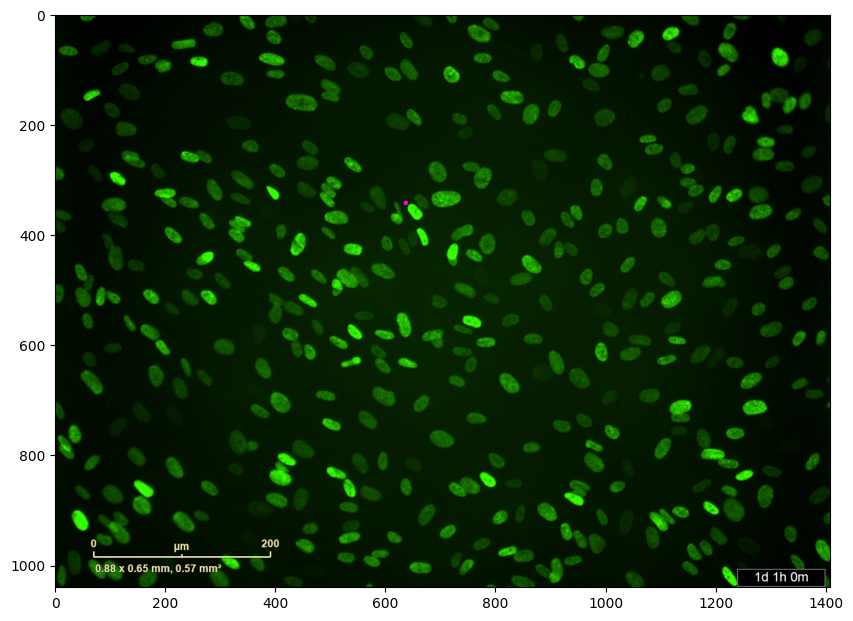

In [ ]:
# Test display one filled polygon on the original image

data_dir = 'data/'
img_path = "/content/data/images/10 Gy_GFP-H2B_A1_1_2023y06m24d_18h17m.png"

# Define an array of endpoints of Hexagon
points = np.array([[220, 120], [130, 200], [130, 300],
                   [220, 380], [310, 300], [310, 200]])

label_path = "/content/data/labels/10 Gy_GFP-H2B_A1_1_2023y06m24d_18h17m.txt"

_, img = load_img(img_path)
points = load_polys(label_path)[0]
print(points)
x,y = img.shape[1], img.shape[0]
xy_length = np.array([img.shape[1], img.shape[0]])
points = points*xy_length
points = points.astype(np.int32)
# points = change_origin(np.array([0,0]), points)
# print(points)
# buf = ["1 " + " ".join(map(str, points.flatten())), "1 " + " ".join(map(str, points.flatten()))]
# with open('points.txt',"w") as f:
#     f.write("\n".join(buf))
# np.savetxt('points.txt', points.flatten(), fmt="%f", newline=" ")
display(img, points)


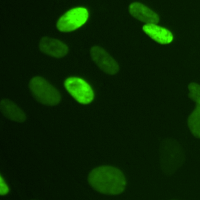

In [ ]:
from PIL import Image
im = Image.open(img_path)
# np.array(im).shape
box = (200, 424, 400, 624)
img2 = im.crop(box)
img2

[array([[0.5       , 0.5       ],
       [0.50446429, 0.50892857],
       [0.50446429, 0.52232143],
       [0.49553571, 0.53125   ],
       [0.48660714, 0.53125   ],
       [0.47767857, 0.52678571],
       [0.47321429, 0.51339286],
       [0.47767857, 0.50892857],
       [0.48214286, 0.5       ],
       [0.49107143, 0.5       ]])]


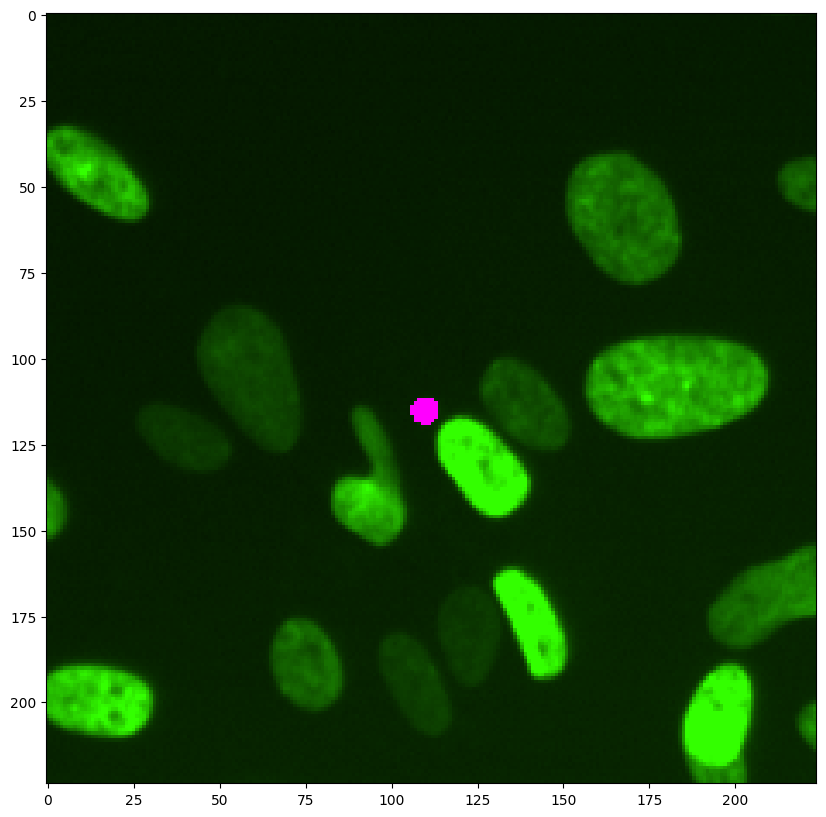

In [ ]:
# Test display one filled polygon on the cropped image
img_path = "/content/dest/images/10 Gy_GFP-H2B_A1_1_2023y06m24d_18h17m_0.png"
label_path = "/content/dest/labels/10 Gy_GFP-H2B_A1_1_2023y06m24d_18h17m_0.txt"

_, img = load_img(img_path)
points = load_polys(label_path, 1)
print(points)

x,y = img.shape[1], img.shape[0]
xy_length = np.array([img.shape[1], img.shape[0]])
points = points*xy_length
points = points.astype(np.int32)
display(img, points)

# Train yolo

In [ ]:
# install yolov8
%pip install -qU ultralytics

# install trainyolo sdk
%pip install -qU trainyolo-py

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 800.1/800.1 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 40.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.0 MB/s eta 0:00:00


In [ ]:
!unzip MNseg.zip -d MNseg

Archive:  MNseg.zip
   creating: MNseg/MNseg/train/
   creating: MNseg/MNseg/val/
   creating: MNseg/MNseg/train/.ipynb_checkpoints/
   creating: MNseg/MNseg/train/images/
   creating: MNseg/MNseg/train/labels/
   creating: MNseg/MNseg/val/images/
   creating: MNseg/MNseg/val/labels/
  inflating: MNseg/MNseg/dataset.yaml  
  inflating: MNseg/MNseg/train.txt   
  inflating: MNseg/MNseg/val.txt     
 extracting: MNseg/MNseg/train/images/10 Gy_GFP-H2B_A1_1_2023y06m24d_18h17m_0.png  
 extracting: MNseg/MNseg/train/images/10 Gy_GFP-H2B_A1_1_2023y06m24d_19h17m_0.png  
 extracting: MNseg/MNseg/train/images/10 Gy_GFP-H2B_A1_1_2023y06m24d_20h17m_0.png  
 extracting: MNseg/MNseg/train/images/10 Gy_GFP-H2B_A1_1_2023y06m24d_20h17m_1.png  
 extracting: MNseg/MNseg/train/images/10 Gy_GFP-H2B_A1_1_2023y06m24d_21h17m_0.png  
 extracting: MNseg/MNseg/train/images/10 Gy_GFP-H2B_A1_1_2023y06m24d_21h17m_1.png  
 extracting: MNseg/MNseg/train/images/10 Gy_GFP-H2B_A1_1_2023y06m24d_22h17m_0.png  
 extracting

In [ ]:
# YOLO PARAMETERS
IM_SIZE = 224
N_EPOCHS = 100 # you can lower this if you have a large dataset
BATCH_SIZE = 8 # you can increase this if you have a large dataset, > 50 images, you can increase this to 4, >100 images you can increase this to 8
MODEL = 'yolov8n-seg.pt'

# Train yolo model
!yolo task=segment mode=train model=$MODEL data="data/MNseg/dataset.yaml" epochs=$N_EPOCHS imgsz=$IM_SIZE batch=$BATCH_SIZE

Ultralytics YOLOv8.2.54 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=data/MNseg/dataset.yaml, epochs=100, time=None, patience=100, batch=8, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, sho